<a href="https://colab.research.google.com/github/ForestLiu-Challenger/Hello_Github/blob/main/CNN_practise_26july.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Process Images
import torch
import numpy as np
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# 定义数据预处理的变换
transformation = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize(0.5, 0.5)])
# 加载训练集数据
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transformation)

# 加载测试集数据
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transformation)

100%|██████████| 26421880/26421880 [00:02<00:00, 10249854.58it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 174435.89it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3245917.52it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6859046.06it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
batch_size=64

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

In [ ]:
classes = ('T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

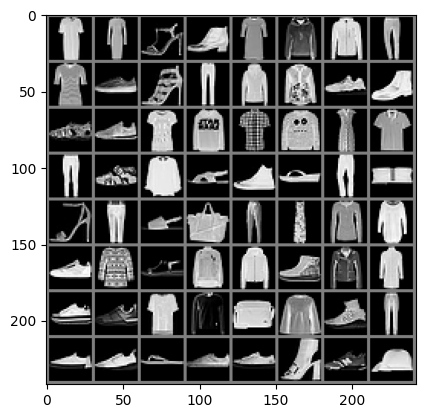

Dress Dress Sandal Ankle boot Dress Pullover Coat  Trouser T-shirt Sneaker Sandal Trouser Coat  Coat  Sneaker Ankle boot Sandal Sneaker T-shirt Pullover Shirt Pullover Dress T-shirt Trouser Sandal Shirt Sandal Sneaker Sandal Trouser Bag   Sandal Trouser Sandal Bag   Trouser Dress T-shirt Pullover Sneaker Pullover Sandal Coat  Coat  Ankle boot Coat  Coat  Sneaker Sneaker Shirt Pullover Bag   Shirt Sneaker Trouser Sneaker Sneaker Sandal Sneaker Sneaker Ankle boot Sneaker Bag  


In [ ]:
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # 定义网络的各个层
        # kernel size是卷积核矩阵的大小，inchanel是输入的个数 outchanel是卷积核的个数，即输出个数
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3)
        #pooling剪裁
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)

        # fully connected layer
        self.fc1 = nn.Linear(800, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        #print(x.shape)  print to find the bugs
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
# 设置学习率
learning_rate = 0.001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [ ]:
losses = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)  #cannot switch the poistions of outputs and labels
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    print(loss)
print('Finished Training')

tensor(0.3335, grad_fn=<NllLossBackward0>)
tensor(0.4318, grad_fn=<NllLossBackward0>)
tensor(0.3848, grad_fn=<NllLossBackward0>)
tensor(0.3421, grad_fn=<NllLossBackward0>)
tensor(0.2812, grad_fn=<NllLossBackward0>)
tensor(0.1220, grad_fn=<NllLossBackward0>)
tensor(0.1644, grad_fn=<NllLossBackward0>)
tensor(0.1011, grad_fn=<NllLossBackward0>)
tensor(0.2573, grad_fn=<NllLossBackward0>)
tensor(0.4336, grad_fn=<NllLossBackward0>)
Finished Training


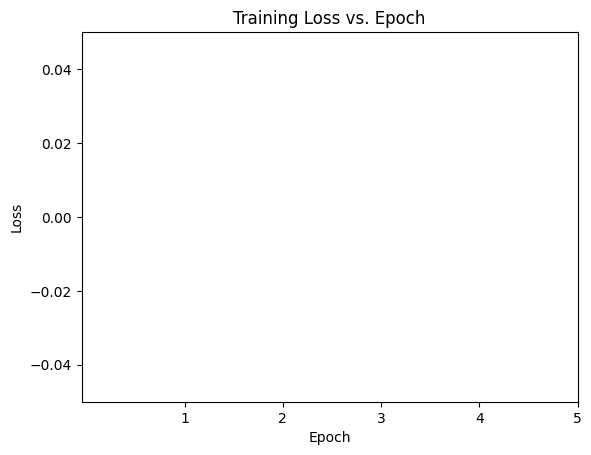

In [ ]:
# 绘制损失随着 epoch 增加的图

plt.plot(losses, '-o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epoch')

# 让 Matplotlib 自动设置 epoch 轴和 y 轴的刻度
plt.autoscale(tight=True)
plt.xticks(range(1, 6))
plt.show()


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

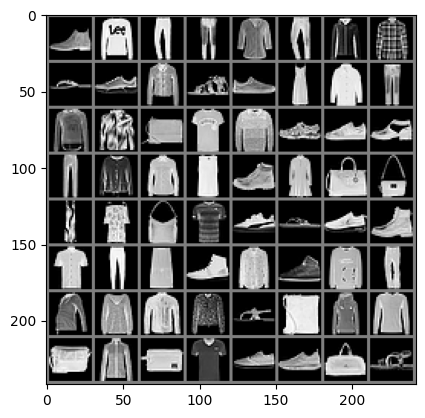

GroundTruth:  Ankle boot Pullover Trouser Trouser Shirt Trouser Coat  Shirt Sandal Sneaker


In [ ]:
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(10)))

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(10)))

Predicted:  Dress Dress Sandal Ankle boot Dress Coat  Coat  Trouser T-shirt Sneaker


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 90 %


In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if prediction == label:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: T-shirt is 83.0 %
Accuracy for class: Trouser is 97.6 %
Accuracy for class: Pullover is 85.5 %
Accuracy for class: Dress is 89.3 %
Accuracy for class: Coat  is 86.0 %
Accuracy for class: Sandal is 97.8 %
Accuracy for class: Shirt is 78.1 %
Accuracy for class: Sneaker is 96.0 %
Accuracy for class: Bag   is 97.5 %
Accuracy for class: Ankle boot is 96.4 %
